In [1]:
]activate /home/csidrane/AAHAA/src/OVERTVerify.jl

  Activating environment at `~/AAHAA/src/OVERTVerify.jl/Project.toml`


In [2]:
;cd /home/csidrane/AAHAA/src/OVERTVerify.jl

/home/csidrane/AAHAA/src/OVERTVerify.jl


In [54]:
# Plotting for Quad 6D 
using PGFPlots
using QHull
using JLD2
using LazySets
using LinearAlgebra

include("src/dependencies.jl")

# load top 
top_data = JLD2.load("src/examples/extra/data/quad6D_reachability_data_15_top.jld2")
top_data_1step = JLD2.load("src/examples/extra/data/quad6D_reachability_data_15_top_1step.jld2")
# load bottom
bottom_data = JLD2.load("src/examples/extra/data/quad6D_reachability_data_15_bottom.jld2")
bottom_data_1step = JLD2.load("src/examples/extra/data/quad6D_reachability_data_15_bottom_1step.jld2")

top_data = top_data["top_data"];
top_data_1step = top_data_1step["top_data"];
bottom_data = bottom_data["bottom_data"];
bottom_data_1step = bottom_data_1step["bottom_data"];

In [4]:
# monte carlo simulate top 
mc_state_sets_t, xvec_t, x0_t, mc_meas_sets_t, yvec_t, y0_t = monte_carlo_simulate(top_data.query, top_data.input_set, n_sim=1000000)
# monte carlo simulate bottom
mc_state_sets_b, xvec_b, x0_b, mc_meas_sets_b, yvec_b, y0_b = monte_carlo_simulate(bottom_data.query, bottom_data.input_set, n_sim=1000000)

[-0.8999546146681731, 0.05000998399336952, -0.10996521896129256, 0.2640974561150646, -0.00027656490481390336, -0.10106155505171378][-0.7900497106992848, 0.06999481071546292, 0.1099574605189632, 0.36902216690147815, 0.1002831058277611, 0.09895863572437405]
[-0.8733528568168097, 0.04999919422157836, -0.12003456683934591, 0.5270350784151392, -0.0006953798670977176, -0.10212140453956385][-0.7534054496939416, 0.0799902159783631, 0.11984725362638518, 0.6374192822328318, 0.10049230756879343, 0.0979284210834754]
[-0.820243170878039, 0.04995442788234916, -0.1302071249315971, 0.7881192741675648, -0.001311170512416739, -0.10317121417976467][-0.6901528507805963, 0.08999602296062309, 0.12963326674941883, 0.904686556936998, 0.10054964444371019, 0.09690971244356668]
[-0.7407770131493334, 0.04986218927192385, -0.1404823820020726, 1.047334867945657, -0.0022309515728629378, -0.10420715226676172][-0.6003325428104577, 0.10002659782696643, 0.13931633215557662, 1.1704959781037252, 0.10040105855916652, 0.095

(Hyperrectangle{Float64, Vector{Float64}, Vector{Float64}}[Hyperrectangle{Float64, Vector{Float64}, Vector{Float64}}([-0.8500000000000001, -0.055, 0.0, 0.05, -0.05, 0.0], [0.050000000000000044, 0.0049999999999999975, 0.1, 0.05, 0.05, 0.1]), Hyperrectangle{Float64, Vector{Float64}, Vector{Float64}}([-0.8450190185578605, -0.06000150052869378, 3.02457597932404e-7, 0.31703898245313356, -0.050062066277276926, -0.0010856526539080313], [0.05493843938205889, 0.009994746584551448, 0.10996645044572109, 0.05330987875670873, 0.05021810586856465, 0.10001711521199556]), Hyperrectangle{Float64, Vector{Float64}, Vector{Float64}}([-0.8133487083614444, -0.06500778910338703, -0.00010898933545402251, 0.5829984374672033, -0.05026734096265231, -0.0021740861430216626], [0.06011016058620078, 0.014992468423043005, 0.11994086612383437, 0.05688541999693719, 0.05045033514453878, 0.10003999119327453]), Hyperrectangle{Float64, Vector{Float64}, Vector{Float64}}([-0.7550463605638362, -0.07003200785544259, -0.00032714

In [68]:

######################
# Plot Styles
######################
define_color("concrete_color", 0x139EAB)
define_color("symbolic_color", 0x9BFF85)
define_color("mc_color", 0x38caff) 
conc_style_solid = "solid, concrete_color, thick, mark=none, fill=concrete_color"
conc_style_transparent = conc_style_solid*", fill opacity=0.0"
sym_style_solid = "solid, symbolic_color, thick, mark=none, fill=symbolic_color"
sym_style_transparent =  sym_style_solid*", fill opacity=0.5"
mc_style_solid = "solid, mc_color, thick, mark=none, fill=mc_color"
mc_style_transparent = mc_style_solid*", fill opacity=0.3"
input_style = "dashed, blue, mark=none"
avoid_set_style = "solid, red, fill=red, fill opacity=0.8, mark=none"

"solid, red, fill=red, fill opacity=0.8, mark=none"

In [69]:
function plot_convex_hull_pgf(xvec, t, dims, fig, style)
    points = xvec[:, t, dims]
    border_idx = chull(points).vertices
    x = points[border_idx, 1]
    y = points[border_idx, 2]
    push!(fig, PGFPlots.Plots.Linear([x..., x[1]], [y..., y[1]], style=style))
end

plot_convex_hull_pgf (generic function with 1 method)

In [70]:
# # Intersect reachable sets with avoid set 
# # construct avoid set as HPolytope from Hyperplanes
# lx = HalfSpace([-1.,  0.,  0., 0., 0., 0.], 0.1) # x >= -0.1  ->  0.1 >= -x aka -x <= 0.1
# hx = HalfSpace([ 1.,  0.,  0., 0., 0., 0.], 0.1) # x <= 0.1
# ly = HalfSpace([ 0., -1.,  0., 0., 0., 0.], 0.1) # -y <= 0.1 aka y >= -0.1
# hy = HalfSpace([ 0.,  1.,  0., 0., 0., 0.], 0.1) # y <= 0.1
# lz = HalfSpace([ 0.,  0., -1., 0., 0., 0.], 0.1) # -z <= 0.1 aka z >= -0.1
# hz = HalfSpace([ 0.,  0.,  1., 0., 0., 0.], 0.1) # z <= 0.1
# avoid_set = HPolytope([lx, hx, ly, hy, lz, hz]) # square 

t=1
isempty(top_data.reach_sets[t] ∩ avoid_set):true
isempty(bottom_data.reach_sets[t] ∩ avoid_set):true


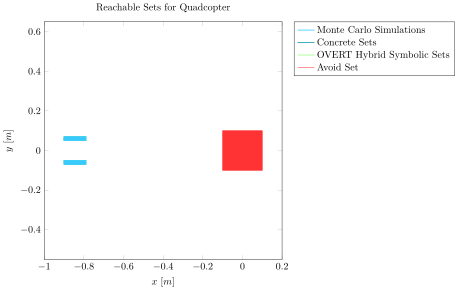

t=2
isempty(top_data.reach_sets[t] ∩ avoid_set):true
isempty(bottom_data.reach_sets[t] ∩ avoid_set):true


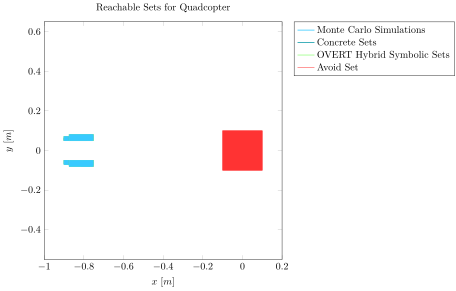

t=3
isempty(top_data.reach_sets[t] ∩ avoid_set):true
isempty(bottom_data.reach_sets[t] ∩ avoid_set):true


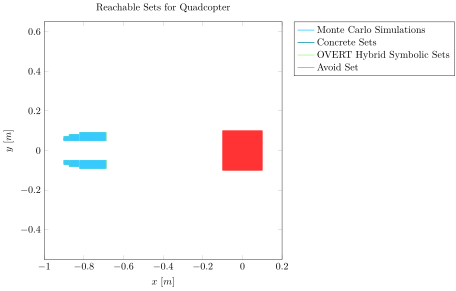

t=4
isempty(top_data.reach_sets[t] ∩ avoid_set):true
isempty(bottom_data.reach_sets[t] ∩ avoid_set):true


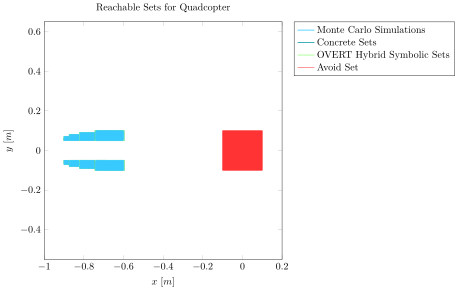

t=5
isempty(top_data.reach_sets[t] ∩ avoid_set):true
isempty(bottom_data.reach_sets[t] ∩ avoid_set):true


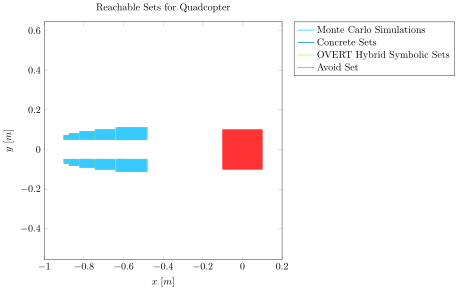

t=6
isempty(top_data.reach_sets[t] ∩ avoid_set):true
isempty(bottom_data.reach_sets[t] ∩ avoid_set):true


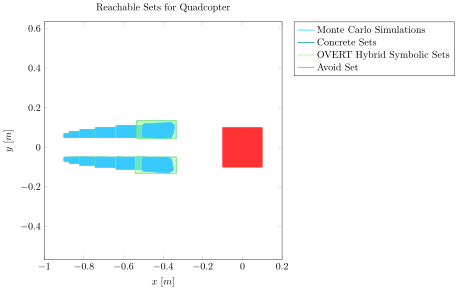

t=7
isempty(top_data.reach_sets[t] ∩ avoid_set):true
isempty(bottom_data.reach_sets[t] ∩ avoid_set):true


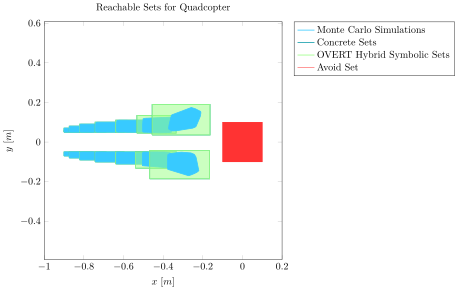

t=8
isempty(top_data.reach_sets[t] ∩ avoid_set):false
isempty(bottom_data.reach_sets[t] ∩ avoid_set):true


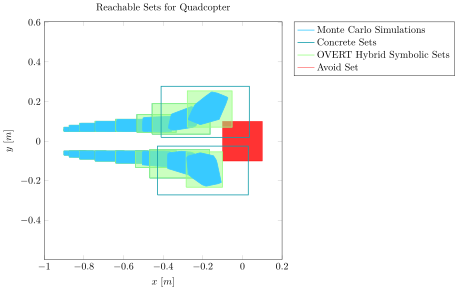

t=9
isempty(top_data.reach_sets[t] ∩ avoid_set):true
isempty(bottom_data.reach_sets[t] ∩ avoid_set):false


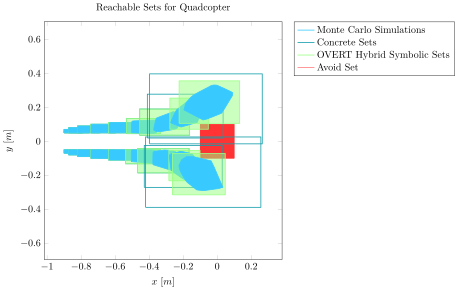

t=10
isempty(top_data.reach_sets[t] ∩ avoid_set):true
isempty(bottom_data.reach_sets[t] ∩ avoid_set):false


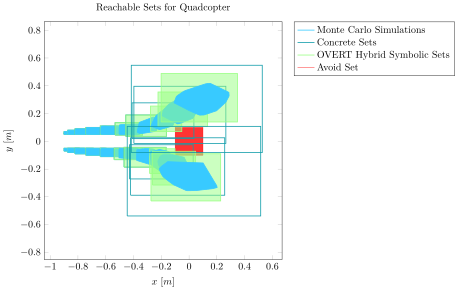

t=11
isempty(top_data.reach_sets[t] ∩ avoid_set):true
isempty(bottom_data.reach_sets[t] ∩ avoid_set):true


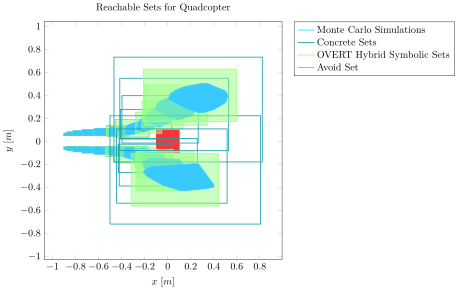

t=12
isempty(top_data.reach_sets[t] ∩ avoid_set):true
isempty(bottom_data.reach_sets[t] ∩ avoid_set):true


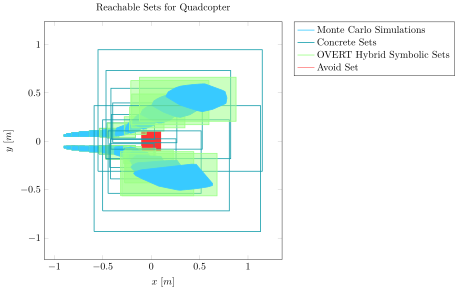

t=13
isempty(top_data.reach_sets[t] ∩ avoid_set):true
isempty(bottom_data.reach_sets[t] ∩ avoid_set):true


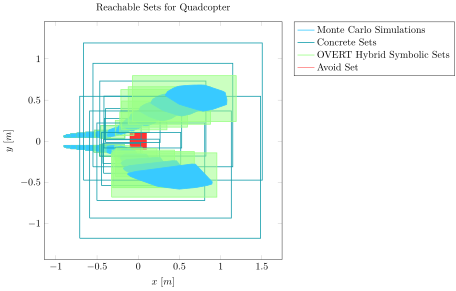

t=14
isempty(top_data.reach_sets[t] ∩ avoid_set):true
isempty(bottom_data.reach_sets[t] ∩ avoid_set):true


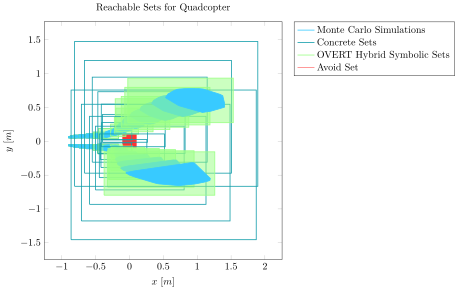

t=15
isempty(top_data.reach_sets[t] ∩ avoid_set):true
isempty(bottom_data.reach_sets[t] ∩ avoid_set):true


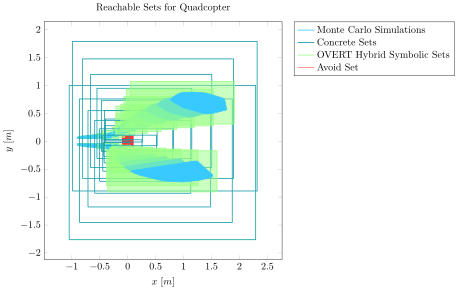

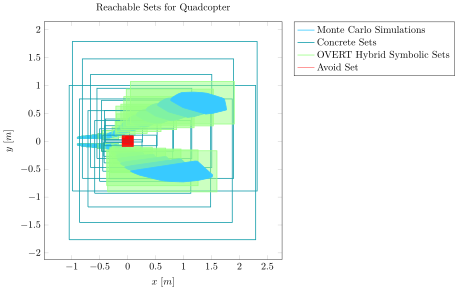

In [71]:
######################
# Plotting in PGF. 
# Plot 1: x-y position of quad + obstacle 
######################
using Polyhedra
dims=[1,2]
avoid_set =  overapproximate(convert(HPolyhedron, eliminate(polyhedron(convert(HPolyhedron,top_data.avoid_sets[1])), [3,4,5,6])), Hyperrectangle)
function init_fig_quad()
    fig = PGFPlots.Axis(axisEqual=true, style="width=10cm, height=10cm", xlabel="\$x~[m]\$", ylabel="\$y~[m]\$", title="Reachable Sets for Quadcopter")
    # hack for legend
    push!(fig, PGFPlots.Plots.Linear([-0.7, -0.7], [0.2, 0.2], style=mc_style_solid, legendentry="Monte Carlo Simulations"))
    # plot init set in both concrete and hybrid colors
    inputx, inputy = get_rectangle(top_data.input_set, dims)
    push!(fig, PGFPlots.Plots.Linear(inputx, inputy, style=conc_style_transparent, legendentry="Concrete Sets"))
    push!(fig, PGFPlots.Plots.Linear(inputx, inputy, style=sym_style_transparent, legendentry="OVERT Hybrid Symbolic Sets"))
    # plot avoid set
    push!(fig, PGFPlots.Plots.Linear( get_rectangle(avoid_set, dims)..., style=avoid_set_style, legendentry="Avoid Set"))
    fig.legendStyle =  "at={(1.05,1.0)}, anchor=north west"
    return fig
end
fig = init_fig_quad()
for t in 1:top_data.query.ntime
#     fig = init_fig_quad()
    if t == top_data.query.ntime
        conc_style = conc_style_transparent
        sym_style = sym_style_transparent
    else
        conc_style = conc_style_transparent
        sym_style = sym_style_transparent
    end 
    push!(fig, PGFPlots.Plots.Linear( get_rectangle(top_data_1step.sym_st_sets[t], dims)..., style=conc_style))
    push!(fig, PGFPlots.Plots.Linear( get_rectangle(bottom_data_1step.sym_st_sets[t], dims)..., style=conc_style))
    push!(fig, PGFPlots.Plots.Linear( get_rectangle(top_data.reach_sets[t], dims)..., style=sym_style))
    push!(fig, PGFPlots.Plots.Linear( get_rectangle(bottom_data.reach_sets[t], dims)..., style=sym_style))
    # plot mc_sim points 
    plot_convex_hull_pgf(xvec_t, t, dims, fig, mc_style_solid)
    plot_convex_hull_pgf(xvec_b, t, dims, fig, mc_style_solid)
    println("t=",t)
    println("isempty(top_data.reach_sets[t] ∩ avoid_set):", isempty(top_data.reach_sets[t] ∩ top_data.avoid_sets[1]))
    println("isempty(bottom_data.reach_sets[t] ∩ avoid_set):", isempty(bottom_data.reach_sets[t] ∩ top_data.avoid_sets[1]))
    display(fig)
end
    push!(fig, PGFPlots.Plots.Linear( get_rectangle(avoid_set, dims)..., style=avoid_set_style))
display(fig)